In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the csv data files  
df_original = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/merged_original.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_original.head())
df_original
print("====================================================================================================================")

df_rainfall_20 = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Rainfall_2020_Data.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_rainfall_20.head())
df_original
print("====================================================================================================================")

df_rainfall_21 = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Rainfall_2021_Data.csv",error_bad_lines=False, warn_bad_lines=True)
print(df_rainfall_21.head())
df_original
print("====================================================================================================================")


   Unnamed: 0   READ DATE  CONSUMPTION(KWH)  SOLD TO GRID(KWH) year_month
0           0  2020-05-07              0.29                0.0    2020-05
1           1  2020-05-08              0.34                0.0    2020-05
2           2  2020-05-09              0.41                0.0    2020-05
3           3  2020-05-10              0.52                0.0    2020-05
4           4  2020-05-11              0.35                0.0    2020-05
  Product code  ...  Quality
0   IDCJAC0009  ...        Y
1   IDCJAC0009  ...        Y
2   IDCJAC0009  ...        Y
3   IDCJAC0009  ...        Y
4   IDCJAC0009  ...        Y

[5 rows x 8 columns]
  Product code  ...  Quality
0   IDCJAC0009  ...        N
1   IDCJAC0009  ...        N
2   IDCJAC0009  ...        N
3   IDCJAC0009  ...        N
4   IDCJAC0009  ...        N

[5 rows x 8 columns]


In [ ]:
df_original.shape

(293, 5)

In [ ]:
df_rainfall_20.shape

(366, 8)

In [ ]:
df_rainfall_21.shape

(90, 8)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dropping columns from 2020
df_rainfall_20.drop(["Product code", "Bureau of Meteorology station number"],axis = 1, inplace = True)
df_rainfall_20

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,2020,1,1,0.0,NaN,Y
1,2020,1,2,0.0,NaN,Y
2,2020,1,3,0.0,NaN,Y
3,2020,1,4,0.0,NaN,Y
4,2020,1,5,4.8,1.0,Y
...,...,...,...,...,...,...
361,2020,12,27,0.0,NaN,N
362,2020,12,28,0.0,NaN,N
363,2020,12,29,0.0,NaN,N
364,2020,12,30,0.0,NaN,N


In [ ]:
#dropping columns from 2021
df_rainfall_21.drop(["Product code", "Bureau of Meteorology station number"],axis = 1, inplace = True)
df_rainfall_21

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,2021,1,1,0.0,NaN,N
1,2021,1,2,0.0,NaN,N
2,2021,1,3,8.2,1.0,N
3,2021,1,4,5.8,1.0,N
4,2021,1,5,19.6,1.0,N
...,...,...,...,...,...,...
85,2021,3,27,4.2,1.0,N
86,2021,3,28,1.4,1.0,N
87,2021,3,29,0.0,NaN,N
88,2021,3,30,0.0,NaN,N


In [ ]:
# dropping values from the 1 to 4 months in 2020
New20 = df_rainfall_20[ (df_rainfall_20['Month'] >= 1) & (df_rainfall_20['Month'] <= 4) ].index
df_rainfall_20.drop(New20 , inplace=True)
df_rainfall_20

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
121,2020,5,1,16.8,1.0,N
122,2020,5,2,8.6,1.0,N
123,2020,5,3,10.8,1.0,N
124,2020,5,4,1.8,1.0,N
125,2020,5,5,0.2,1.0,N
...,...,...,...,...,...,...
361,2020,12,27,0.0,NaN,N
362,2020,12,28,0.0,NaN,N
363,2020,12,29,0.0,NaN,N
364,2020,12,30,0.0,NaN,N


In [ ]:
# dropping values from the 3 to 12 months in 2021
New21 = df_rainfall_21[(df_rainfall_21['Month'] > 2) ].index
df_rainfall_21.drop(New21 , inplace=True)
df_rainfall_21

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,2021,1,1,0.0,NaN,N
1,2021,1,2,0.0,NaN,N
2,2021,1,3,8.2,1.0,N
3,2021,1,4,5.8,1.0,N
4,2021,1,5,19.6,1.0,N
5,2021,1,6,0.0,NaN,N
6,2021,1,7,0.0,NaN,N
7,2021,1,8,0.0,NaN,N
8,2021,1,9,0.0,NaN,N
9,2021,1,10,0.0,NaN,N


In [ ]:
#combined two rainfall dataset
df_combined = pd.concat([df_rainfall_20,df_rainfall_21])

In [ ]:
# finding NaN values 
missing_values= pd.isnull(df_combined["Period over which rainfall was measured (days)"]) 

# displaying data only with Period over which rainfall was measured = NaN 
df_combined[missing_values]

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
126,2020,5,6,0.0,NaN,N
127,2020,5,7,0.0,NaN,N
128,2020,5,8,0.0,NaN,N
132,2020,5,12,0.0,NaN,N
133,2020,5,13,0.0,NaN,N
...,...,...,...,...,...,...
53,2021,2,23,0.0,NaN,N
54,2021,2,24,0.0,NaN,N
55,2021,2,25,0.0,NaN,N
57,2021,2,27,0.0,NaN,N


In [ ]:
# get mean of values in column Period over which rainfall was measured (days)
mean_value =df_combined['Period over which rainfall was measured (days)'].mean()
print('Mean of values in column Period over which rainfall was measured (days):')
print(mean_value)


Mean of values in column Period over which rainfall was measured (days) in 2020:
1.0074074074074073


In [ ]:
#filling the missing values by mean
df_combined['Period over which rainfall was measured (days)'].fillna(value=df_combined['Period over which rainfall was measured (days)'].mean(), inplace=True)
print('Updated Dataframe:')
print(df_combined)


Updated Dataframe:
     Year  Month  ...  Period over which rainfall was measured (days)  Quality
121  2020      5  ...                                        1.000000        N
122  2020      5  ...                                        1.000000        N
123  2020      5  ...                                        1.000000        N
124  2020      5  ...                                        1.000000        N
125  2020      5  ...                                        1.000000        N
..    ...    ...  ...                                             ...      ...
54   2021      2  ...                                        1.007407        N
55   2021      2  ...                                        1.007407        N
56   2021      2  ...                                        1.000000        N
57   2021      2  ...                                        1.007407        N
58   2021      2  ...                                        1.007407        N

[304 rows x 6 columns]


In [ ]:
#combined year month and day into one column read date
df_combined["READ DATE"] = pd.to_datetime(df_combined[["Year", "Month", "Day"]])

In [ ]:
df_combined.drop(['Year', 'Month', 'Day'], axis=1,inplace=True)

#converted read date into object
from datetime import datetime
def convert_datetime(dt):
    return datetime.strftime(dt, '%Y-%m-%d')


df_combined['READ DATE'] = df_combined['READ DATE'].apply(convert_datetime)

df_combined

,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,READ DATE
121,16.8,1.000000,N,2020-05-01
122,8.6,1.000000,N,2020-05-02
123,10.8,1.000000,N,2020-05-03
124,1.8,1.000000,N,2020-05-04
125,0.2,1.000000,N,2020-05-05
...,...,...,...,...
54,0.0,1.007407,N,2021-02-24
55,0.0,1.007407,N,2021-02-25
56,0.4,1.000000,N,2021-02-26
57,0.0,1.007407,N,2021-02-27


In [ ]:
df_merged = pd.merge(df_original,df_combined)

In [ ]:
df_combined.dtypes

Rainfall amount (millimetres)                     float64
Period over which rainfall was measured (days)    float64
Quality                                            object
READ DATE                                          object
dtype: object

In [ ]:
df_original.dtypes

Unnamed: 0             int64
READ DATE             object
CONSUMPTION(KWH)     float64
SOLD TO GRID(KWH)    float64
year_month            object
dtype: object

In [ ]:
#Merged whole dataset
df_merged.drop(['Unnamed: 0'], axis=1,inplace=True)
df_merged

,READ DATE,CONSUMPTION(KWH),SOLD TO GRID(KWH),year_month,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,2020-05-07,0.29,0.00,2020-05,0.0,1.007407,N
1,2020-05-08,0.34,0.00,2020-05,0.0,1.007407,N
2,2020-05-09,0.41,0.00,2020-05,5.0,1.000000,N
3,2020-05-10,0.52,0.00,2020-05,10.2,1.000000,N
4,2020-05-11,0.35,0.00,2020-05,2.6,1.000000,N
...,...,...,...,...,...,...,...
288,2021-02-19,3.66,11.73,2021-02,0.0,1.007407,N
289,2021-02-20,3.04,9.94,2021-02,0.0,1.007407,N
290,2021-02-21,2.54,3.54,2021-02,0.0,1.007407,N
291,2021-02-22,3.43,6.92,2021-02,0.0,1.007407,N


In [ ]:
#Correlation matrix for consumption and rainfall
df_merged[['CONSUMPTION(KWH)','Rainfall amount (millimetres)']].corr()

,CONSUMPTION(KWH),Rainfall amount (millimetres)
CONSUMPTION(KWH),1.000000,0.050311
Rainfall amount (millimetres),0.050311,1.000000


In [ ]:
#Correlation matrix for whole 
df_merged.corr()

,CONSUMPTION(KWH),SOLD TO GRID(KWH),Rainfall amount (millimetres),Period over which rainfall was measured (days)
CONSUMPTION(KWH),1.000000,-0.324154,0.050311,-0.001380
SOLD TO GRID(KWH),-0.324154,1.000000,-0.109258,-0.014153
Rainfall amount (millimetres),0.050311,-0.109258,1.000000,-0.052827
Period over which rainfall was measured (days),-0.001380,-0.014153,-0.052827,1.000000


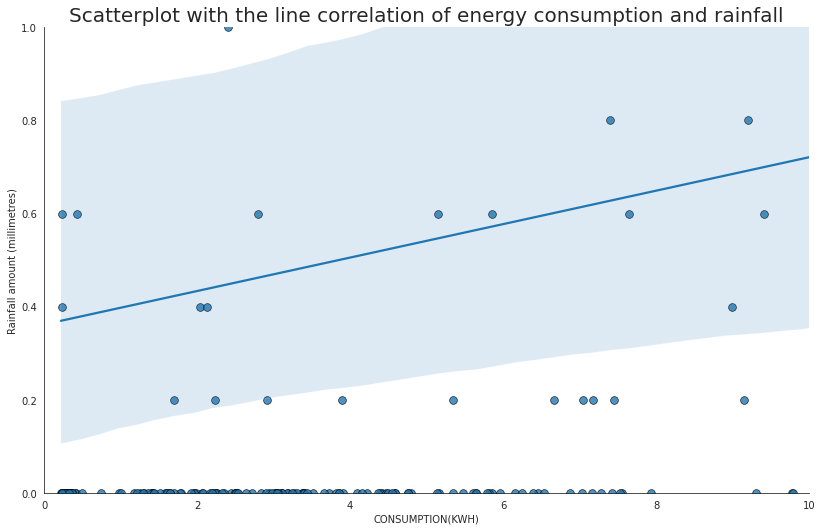

In [ ]:
sns.set_style("white")
gridobj = sns.lmplot(x="CONSUMPTION(KWH)", y="Rainfall amount (millimetres)", data=df_merged, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0, 10), ylim=(0, 1))
plt.title("Scatterplot with the line correlation of energy consumption and rainfall", fontsize=20)
plt.show()